In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
from scipy.sparse import csr_matrix, lil_matrix
from scipy import spatial
from scipy import stats

In [14]:
sales = pd.read_csv('Sales_Data.csv', parse_dates=['transaction timestamp'])

sales.rename(index=str, columns={'transaction id': 'transID',
                              'product id' : 'prdtID',
                              'product description' : 'description',
                              'quantity sold' : 'quantity',
                              'transaction timestamp' : 'timestamp',
                              'day_name' : 'day',
                              'day_of_month' : 'day_num',
                              'month_of_year' : 'month',
                              'time_of_day(hh:mm:ss)' : 'time',
                              'unit price' : 'price',
                              'customer id' : 'custID',
                              'transaction country' : 'country'}, inplace=True)

columns = ['transID', 'custID', 'prdtID', 'description', 'quantity', 'price', 'country', 'timestamp', 'date', 'day', 'day_num', 'month', 'time']

# convert to lower case
sales['description'] = sales['description'].str.lower()
# remove trailing white spaces
sales['description'] = sales['description'].str.strip()

sales = sales.drop_duplicates()

sales['total_price'] = sales['quantity'] * sales['price']

In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   transID      536641 non-null  object        
 1   prdtID       536641 non-null  object        
 2   description  535187 non-null  object        
 3   quantity     536641 non-null  int64         
 4   timestamp    536641 non-null  datetime64[ns]
 5   price        536641 non-null  float64       
 6   custID       401604 non-null  float64       
 7   country      536641 non-null  object        
 8   date         536641 non-null  object        
 9   day          536641 non-null  object        
 10  day_num      536641 non-null  int64         
 11  month        536641 non-null  object        
 12  time         536641 non-null  object        
 13  total_price  536641 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 61.4+ MB


In [16]:
missing_values_count = sales.isnull().sum()
missing_values_count

transID             0
prdtID              0
description      1454
quantity            0
timestamp           0
price               0
custID         135037
country             0
date                0
day                 0
day_num             0
month               0
time                0
total_price         0
dtype: int64

In [17]:
sales['description'] = sales['description'].fillna('Unspecified')
sales['custID'] = sales['custID'].fillna(-9999)
sales['custID'] = sales['custID'].apply(lambda x: str(x)[:-2])

In [18]:
missing_values_count = sales.isnull().sum()
missing_values_count

transID        0
prdtID         0
description    0
quantity       0
timestamp      0
price          0
custID         0
country        0
date           0
day            0
day_num        0
month          0
time           0
total_price    0
dtype: int64

In [19]:
sales.describe()

,quantity,price,day_num,total_price
count,536641.000000,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,15.024640,18.123861
std,219.130156,97.233118,8.663351,380.656263
min,-80995.000000,-11062.060000,1.000000,-168469.600000
25%,1.000000,1.250000,7.000000,3.750000
50%,3.000000,2.080000,15.000000,9.870000
75%,10.000000,4.130000,22.000000,17.400000
max,80995.000000,38970.000000,31.000000,168469.600000


In [20]:
sales = sales[sales.quantity > 0]
sales = sales[sales.price > 0]

In [21]:
list1 = sales['transID'].str[0]
list1.value_counts()

5    524877
A         1
Name: transID, dtype: int64

In [22]:
sales.describe()

,quantity,price,day_num,total_price
count,524878.000000,524878.000000,524878.000000,524878.000000
mean,10.616600,3.922573,15.022472,20.275399
std,156.280031,36.093028,8.660738,271.693566
min,1.000000,0.001000,1.000000,0.001000
25%,1.000000,1.250000,7.000000,3.900000
50%,4.000000,2.080000,15.000000,9.920000
75%,11.000000,4.130000,22.000000,17.700000
max,80995.000000,13541.330000,31.000000,168469.600000


In [23]:
sales.head()

,transID,prdtID,description,quantity,timestamp,price,custID,country,date,day,day_num,month,time,total_price
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00,20.34


In [24]:
sales['week'] = sales['timestamp'].apply(lambda x: x.strftime('%W'))
sales['hour'] = sales['timestamp'].apply(lambda x: x.strftime('%H'))
sales['year'] = sales['timestamp'].apply(lambda x: x.strftime('%Y'))
sales['Month'] = sales['timestamp'].apply(lambda x: x.strftime('%m'))

In [25]:
sales.head()

,transID,prdtID,description,quantity,timestamp,price,custID,country,date,day,day_num,month,time,total_price,week,hour,year,Month
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00,15.30,48,08,2010,12
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00,20.34,48,08,2010,12
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00,22.00,48,08,2010,12
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00,20.34,48,08,2010,12
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00,20.34,48,08,2010,12


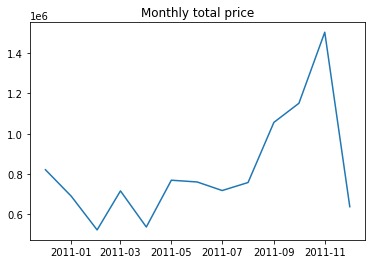

In [26]:
sales2 = sales[['year', 'Month', 'total_price']].groupby(['year', 'Month']).sum().reset_index()
sales2['day'] = 1
sales2['date'] = pd.to_datetime(sales2[['year', 'Month', 'day']])
sales2 = sales2.set_index('date')
sales2 = sales2.drop(['year', 'Month', 'day'], axis=1)

plt.plot(sales2)
plt.title('Monthly total price')        

plt.show()

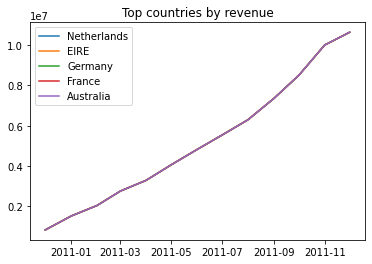

In [27]:
sales_top = sales[['total_price', 'country']].groupby(['country']).sum().reset_index().sort_values(by='total_price', ascending=False)['country'][1:6]

plt.figure()
for c in sales_top:
    sales2 = sales[sales['country'] == c]
    sales2 = sales[['year', 'Month', 'total_price']].groupby(['year', 'Month']).sum().reset_index()
    sales2['day'] = 1
    sales2['date'] = pd.to_datetime(sales2[['year', 'Month', 'day']])
    sales2 = sales2.set_index('date')
    sales2 = sales2.drop(['year', 'Month', 'day'], axis=1)
    plt.plot(sales2.cumsum(), label=c)    
    
plt.legend()
plt.title('Top countries by revenue')  
    
plt.show()

In [28]:
sales_top

24    Netherlands
10           EIRE
14        Germany
13         France
0       Australia
Name: country, dtype: object